# Exploring Tennis Attributes and Tournament Outcomes

#### Authors: A.J. Madison, Robert Silber, and Spencer Tillman

#### Overview: This project is exploring the attributes of tennis players and match conditions to analyze the impact on ace production.

## Literature Review

#### In tennis, scoring an ace can quickly lead to winning a game. Since an ace is scored when a player serves the ball over the net and the opposing player doesn't hit it, it is the quickest way to score and ultimately win the match. If the number of aces could be increased by finding factors that lead to getting an ace, this could improve chances of winning.

#### In the modern era of tennis, 

## Project Background

#### For this project, we will be exploring the number of aces per match and if there are factors that contribute to a high or low number of aces. Through exploring the data, we will be looking if ace totals vary among different features. Finally, through linear regression, we will look to find correlations between different features and ace totals.

## Environment Setup and Data Gathering



In [1]:
#If needed, get requirements.txt file for all required packages

#!curl -0 https://raw.githubusercontent.com/spencer130/COMP4447_FinalProject/main/requirements.txt?token=GHSAT0AAAAAABY4YJJYIHTJ3OVAL4ADFD4KY22WJUA
#!pip install -r requirements.txt

In [1]:
#Import python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import scipy


#### Next, we will be importing our data from a GitHub repository where csv files are created showing ATP tournament data annually. We will import this data directly into a pandas data frame.



In [119]:
#Retrieve data from github

url_1 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_futures_1995.csv'
url_2 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1996.csv'
url_3 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1997.csv'
url_4 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1998.csv'
url_5 = 'https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1999.csv'

tennis_1 = pd.read_csv(url_1)
tennis_2 = pd.read_csv(url_2)
tennis_3 = pd.read_csv(url_3)
tennis_4 = pd.read_csv(url_4)
tennis_5 = pd.read_csv(url_5)

#Combine the data across multiple years into one data frame and add a year column
tennis_df = pd.concat([tennis_1, tennis_2, tennis_3, tennis_4, tennis_5], join='inner')
tennis_df['year'] = [x[:4] for x in tennis_df['tourney_id']]

tennis_df = tennis_df.reset_index(drop=True)

tennis_df.sample(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
21635,1998-439,Umag,Clay,32,A,19980727,19,102344,3.0,NaN,...,17.0,9.0,10.0,0.0,5.0,11.0,2115.0,391.0,83.0,1998
11042,1995-M-SA-TUN-01A-1995a,Tunisia Masters 1,Hard,24,S,19951028,1,102436,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,705.0,15.0,494.0,39.0,1995
1769,1995-M-SA-USA-01A-1995c,USA 1 Masters 3,Clay,64,S,19950317,36,101800,NaN,Q,...,NaN,NaN,NaN,NaN,NaN,515.0,38.0,612.0,25.0,1995
20618,1998-499,Coral Springs,Clay,32,A,19980504,8,102025,5.0,NaN,...,36.0,15.0,13.0,10.0,13.0,79.0,591.0,121.0,379.0,1998
16709,1997-468,Estoril,Clay,32,A,19970407,27,102456,4.0,NaN,...,26.0,2.0,8.0,6.0,10.0,14.0,1681.0,19.0,1443.0,1997
3596,1995-M-SA-UZB-01A-1995d,Uzbekistan Masters 4,Clay,32,S,19950506,24,102711,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1032.0,4.0,1164.0,2.0,1995
15030,1996-D057,Davis Cup G1 PO: TPE vs INA,Hard,4,D,19960920,4,102832,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1031.0,5.0,716.0,16.0,1996
2436,1995-M-SA-GER-01A-1995d,Germany 1 Masters 4,Clay,32,S,19950416,28,101926,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,370.0,79.0,374.0,78.0,1995
17867,1997-321,Stuttgart Outdoor,Clay,48,A,19970714,23,102344,NaN,NaN,...,22.0,14.0,9.0,7.0,10.0,45.0,901.0,20.0,1539.0,1997
13732,1996-520,Roland Garros,Clay,128,G,19960527,102,101990,13.0,NaN,...,39.0,15.0,14.0,10.0,16.0,14.0,1464.0,41.0,934.0,1996


## Data Cleaning

#### There is a lot of data in each csv file. To begin, we will clean the data and put it into a format that is more useful for our analysis. This is necessary before we start exploring the data.

#### We will start by subsetting the data to columns that will be used in the analysis. The columns we need are:
* tourney_name: this gives us the name of the tournament
* surface: the type of court the match is played on
* winner_id: this shows who won the match
* winner_name: the name of the player who won the match
* winner_seed: this shows where the player ranked in the current tournament
* winner_rank: where the winner of the match ranks
* winner_hand: the hand that the winner uses when playing a match
* w_ace: the number of aces the winner had in the match
* winner_age: the age of the player who won the match
* loser_id: this shows who won the match
* loser_name: the name of the player who won the match
* loser_seed: this shows where the player ranked in the current tournament
* loser_rank: where the winner of the match ranks
* loser_hand: the hand that the winner uses when playing a match
* l_ace: the number of aces the winner had in the match
* year: the year in which the match was played


In [120]:
#Subset the data

tennis_df_subset = tennis_df[['tourney_name', 'surface', 'winner_id', 'winner_name', 'winner_seed', 'winner_rank', 'winner_hand', 'w_ace', 'winner_age', 'loser_id', 'loser_name', 'loser_rank', 'loser_seed', 'loser_hand', 'l_ace', 'year']].copy()
tennis_df_subset.sample(10)

,tourney_name,surface,winner_id,winner_name,winner_seed,winner_rank,winner_hand,w_ace,winner_age,loser_id,loser_name,loser_rank,loser_seed,loser_hand,l_ace,year
25793,Basel,Carpet,101736,Andre Agassi,1.0,1.0,R,7.0,29.4,101733,Jan Siemerink,94.0,NaN,L,5.0,1999
16576,Davis Cup G1 QF: AUT vs CRO,Clay,101582,Gilbert Schaller,NaN,83.0,R,NaN,28.0,102085,Sasa Hirszon,396.0,NaN,R,NaN,1997
22291,Grand Slam Cup,Hard,102701,Marcelo Rios,2.0,3.0,L,NaN,22.7,101736,Andre Agassi,8.0,NaN,R,NaN,1998
9947,France 5 Masters 3,Hard,102206,Stephane Matheu,2.0,427.0,R,NaN,22.4,102992,Arnaud Fontaine,NaN,NaN,R,NaN,1995
11459,Japan Masters 3,Hard,103170,Wei Ju Chen,NaN,NaN,R,NaN,17.5,101906,Yasufumi Yamamoto,317.0,2.0,R,NaN,1995
11814,United Arab Emirates Masters 3,Hard,102200,Arnd Caspari,NaN,449.0,R,NaN,22.6,102781,Christian Dillschneider,1273.0,NaN,R,NaN,1995
6154,Colombia Masters 4,Clay,102611,Rafael Serpa Guinazu,3.0,376.0,R,NaN,20.0,107559,Leandro Festino,NaN,NaN,R,NaN,1995
14373,Atlanta Olympics,Hard,101249,Andrei Olhovskiy,NaN,101.0,R,NaN,30.2,102104,Christian Ruud,73.0,NaN,R,NaN,1996
24100,Prague,Clay,101792,Slava Dosedel,NaN,78.0,R,1.0,28.6,102153,German Puentes,163.0,NaN,R,0.0,1999
16860,Monte Carlo Masters,Clay,102247,Andrea Gaudenzi,NaN,112.0,R,2.0,23.7,102201,Lionel Roux,60.0,NaN,R,0.0,1997


#### Next, we need to find and address all null values in the data. To do so, we begin with finding how many there are in the data set.

In [121]:
#Count null values
tennis_df_subset.isna().sum()

tourney_name        0
surface             0
winner_id           0
winner_name         0
winner_seed     15128
winner_rank      1658
winner_hand         0
w_ace           13458
winner_age        236
loser_id            0
loser_name          0
loser_rank       3395
loser_seed      20328
loser_hand          0
l_ace           13458
year                0
dtype: int64

#### We have null values in our winner_seed, winner_rank, w_ace, winner_age, loser_rank, loser_seed, and l_ace columns. The missing values appear to be a result of not having the match data for that column recorded. For age, it's possible the player does not have their age data available. We will replace these nulls with zeroes. We will replace null ace values with 999, as 0 is a valid number of aces.

In [122]:
#Replace null values with zero
tennis_df_subset['winner_seed'] = tennis_df_subset['winner_seed'].fillna(0)
tennis_df_subset['winner_rank'] = tennis_df_subset['winner_rank'].fillna(0)
tennis_df_subset['loser_rank'] = tennis_df_subset['loser_rank'].fillna(0)
tennis_df_subset['loser_seed'] = tennis_df_subset['loser_seed'].fillna(0)
tennis_df_subset['w_ace'] = tennis_df_subset['w_ace'].fillna(999)
tennis_df_subset['l_ace'] = tennis_df_subset['l_ace'].fillna(999)
tennis_df_subset['winner_age'] = tennis_df_subset['winner_age'].fillna(0)
tennis_df_subset.isna().sum()

tourney_name    0
surface         0
winner_id       0
winner_name     0
winner_seed     0
winner_rank     0
winner_hand     0
w_ace           0
winner_age      0
loser_id        0
loser_name      0
loser_rank      0
loser_seed      0
loser_hand      0
l_ace           0
year            0
dtype: int64

####  Now that we have our data subsetted and null values are addressed, we need to check our data types to make sure they are in the correct format.

In [123]:
#Check the data types

tennis_df_subset.dtypes

tourney_name     object
surface          object
winner_id         int64
winner_name      object
winner_seed     float64
winner_rank     float64
winner_hand      object
w_ace           float64
winner_age      float64
loser_id          int64
loser_name       object
loser_rank      float64
loser_seed      float64
loser_hand       object
l_ace           float64
year             object
dtype: object

#### Most of the data types seem good. However, our year and winner_age columns should be changed to integers. We can change the data types to be more accurate.

In [124]:
tennis_df_subset['year'] = pd.to_numeric(tennis_df_subset['year'])
tennis_df_subset['winner_age'] = tennis_df_subset['winner_age'].astype('int')
tennis_df_subset.dtypes

tourney_name     object
surface          object
winner_id         int64
winner_name      object
winner_seed     float64
winner_rank     float64
winner_hand      object
w_ace           float64
winner_age        int64
loser_id          int64
loser_name       object
loser_rank      float64
loser_seed      float64
loser_hand       object
l_ace           float64
year              int64
dtype: object

In [125]:
#tennis_df_subset['winner_age'] = tennis_df_subset['winner_age'].apply(lambda x: round(x))
tennis_df_subset.sample(10)

,tourney_name,surface,winner_id,winner_name,winner_seed,winner_rank,winner_hand,w_ace,winner_age,loser_id,loser_name,loser_rank,loser_seed,loser_hand,l_ace,year
18386,Long Island,Hard,102158,Patrick Rafter,8.0,14.0,R,2.0,24,102539,Bohdan Ulihrach,34.0,0.0,R,5.0,1997
6975,Russia Masters 4,Clay,100955,Yahiya Doumbia,8.0,753.0,R,999.0,31,101484,Vladimir Gabrichidze,977.0,0.0,R,999.0,1995
23179,San Jose,Hard,102021,Michael Chang,4.0,26.0,R,3.0,26,102644,Franco Squillari,62.0,0.0,L,2.0,1999
5637,Italy 3 Masters 3,Clay,102414,Jerome Loustalot,0.0,472.0,R,999.0,21,102613,Francesco Cina,450.0,7.0,R,999.0,1995
13905,Bologna,Clay,102238,Alberto Berasategui,5.0,50.0,R,0.0,22,101475,Carlos Costa,36.0,1.0,R,4.0,1996
5878,USA 4 Masters 2,Hard,108649,Chris Numbers,0.0,0.0,U,999.0,23,102424,Masahide Sakamoto,1241.0,0.0,R,999.0,1995
885,Great Britain 1 Masters 3,Carpet,102220,Patrik Fredriksson,0.0,382.0,R,999.0,21,102733,Colin Bennett,0.0,0.0,R,999.0,1995
3217,Brazil 1 Masters 3,Hard,102887,Ramon Delgado,2.0,581.0,R,999.0,18,107963,Pedro Zannoni,1035.0,0.0,R,999.0,1995
6817,Italy 4 Masters 3,Clay,101987,Vincenzo Carlone,5.0,516.0,R,999.0,23,102999,Stefano Galvani,0.0,0.0,R,999.0,1995
4203,Germany 2 Masters 1,Clay,101388,Gerardo Mirad,5.0,423.0,R,999.0,27,101981,Sascha Bandermann,494.0,0.0,L,999.0,1995


## Exploratory Data Analysis

#### After cleaning our data, we can begin exploring it. We will then visualize our data to get a better understanding.

In [126]:
#How many tournaments are in the data
tournament_names = tennis_df_subset['tourney_name'].unique()
print('There were ' + str(len(tournament_names)) + ' tournaments played in this timeframe')

There were 809 tournaments played in this timeframe


#### What is the range of aces per match?

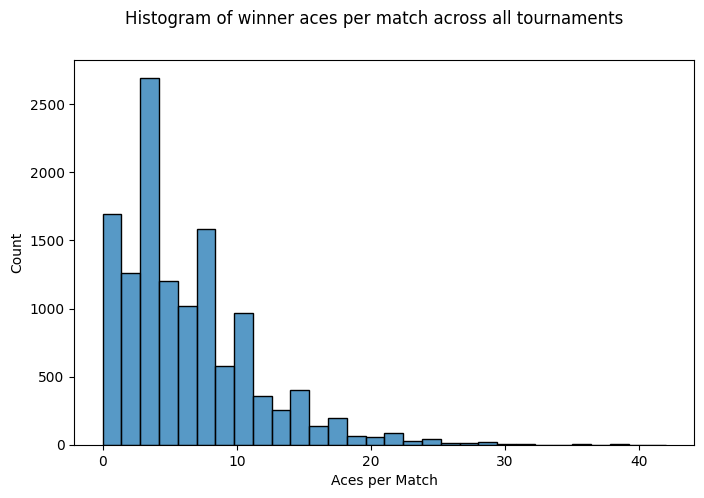

In [127]:
#What is the range of winners aces in the tournaments? Also remove values equal to 999 to not include NaN
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(x='w_ace', bins=30, data=tennis_df_subset[-(tennis_df_subset['w_ace']==999)], ax=ax)
fig.suptitle('Histogram of winner aces per match across all tournaments')
ax.set(xlabel='Aces per Match')

plt.show()


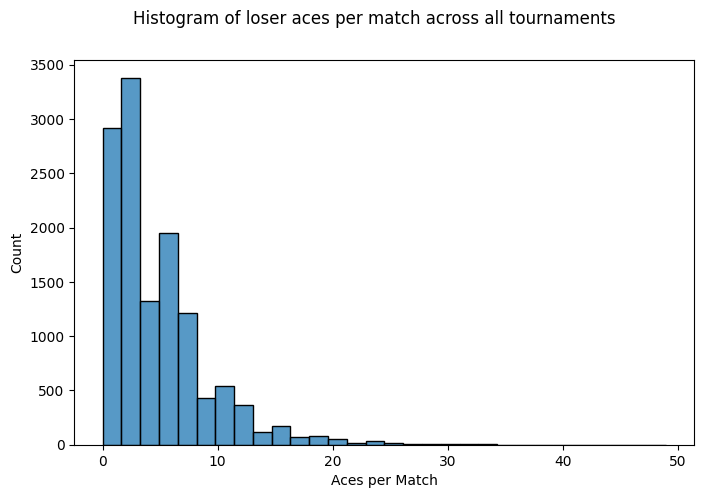

In [128]:
#What is the range of winners aces in the tournaments? Also remove values equal to 999 to not include NaN
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(x='l_ace', bins=30, data=tennis_df_subset[-(tennis_df_subset['l_ace']==999)], ax=ax)
fig.suptitle('Histogram of loser aces per match across all tournaments')
ax.set(xlabel='Aces per Match')

plt.show()


#### What is the range of winners across all tournaments?

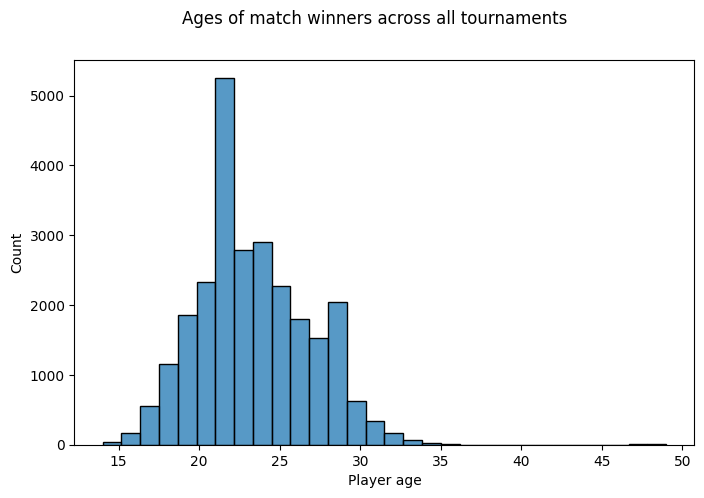

In [129]:
#What is the range of winners ages? Also remove values equal to zero
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(x='winner_age', bins=30, data=tennis_df_subset[-(tennis_df_subset['winner_age']==0)], ax=ax)
fig.suptitle('Ages of match winners across all tournaments')
ax.set(xlabel='Player age')

plt.show()

#### Who has the most wins over the timeframe and how many?

Yevgeny Kafelnikov has 255 wins.
0    80
1    55
2    58
3    62
Name: winner_name, dtype: int64


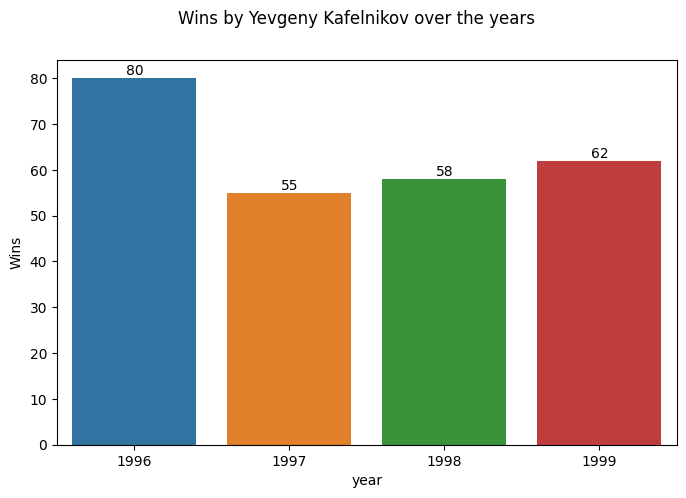

In [130]:
#Most wins by a player over the timeframe
most_wins = str(tennis_df_subset['winner_name'].value_counts().max())
player_most_wins = tennis_df_subset['winner_name'].value_counts().index.tolist()[0]
print(str(player_most_wins) + ' has ' + str(most_wins) + ' wins.')

#Wins by that player over time
player = tennis_df_subset.loc[tennis_df_subset['winner_name']==tennis_df_subset['winner_name'].value_counts().index.tolist()[0]]

player_wins = player.groupby(by='year', as_index=False).count()
print(player_wins['winner_name'])

#Chart showing wins by year
fig, ax = plt.subplots(figsize=(8, 5))

player_wins_chart = sns.barplot(x='year', y='winner_id', data=player_wins, ax=ax)
ax.bar_label(player_wins_chart.containers[0])
ax.set(ylabel='Wins')
fig.suptitle('Wins by ' + player_most_wins + ' over the years')

plt.show()


#### How many aces did Yevgeny Kafelnikov have in their wins?

In [131]:
# Create a new dataset with no null aces values
no_null_aces = tennis_df_subset[tennis_df_subset.w_ace != 999.0]

# Use this dataset to group the winners by name
winners = no_null_aces.groupby('winner_name')

#Create a dataframe of just Yevgeny Kafelnikov wins and then sum the w_ace column.

Yevgeny_df = winners.get_group('Yevgeny Kafelnikov')
sum_aces = Yevgeny_df.w_ace.sum()
print('Yevgeny Kafelnikov had ' + str(sum_aces) + ' aces in their victories')

Yevgeny Kafelnikov had 1552.0 aces in their victories


## Feature Engineering

#### Total aces averages per surface type

['Hard' 'Carpet' 'Clay' 'Grass'] 4


Text(0.5, 1.0, 'Number of aces on each surface type')

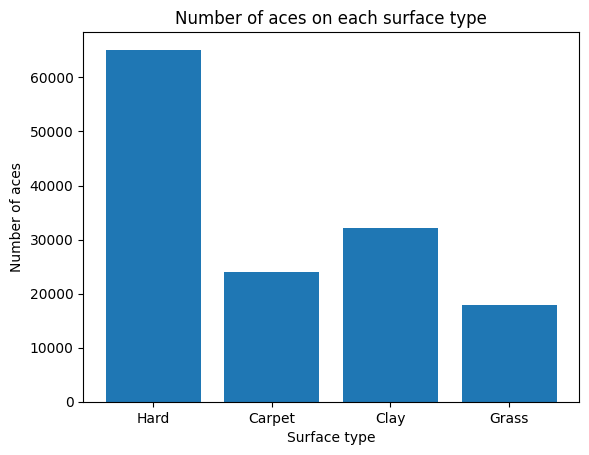

In [132]:
# Lets create a new variable called total_ace, which is the sum of aces in each match.
tennis_df_subset['total_ace'] = tennis_df_subset['w_ace'] + tennis_df_subset['l_ace']

# Lets create a new dataset that will only take in valid values of total_ace
valid_aces_df = tennis_df_subset[tennis_df_subset['total_ace']!= 1998.0]

# Now, lets see how many unique surfaces there are
unique_surfaces = valid_aces_df.surface.unique()
print(unique_surfaces, len(unique_surfaces))

# Lets group valid_aces_df by surface type
surfaces_df = valid_aces_df.groupby('surface')

# Lets use surfaces_df to isolate each type of surface
Hard_df = surfaces_df.get_group('Hard')
Carpet_df = surfaces_df.get_group('Carpet')
Clay_df = surfaces_df.get_group('Clay')
Grass_df = surfaces_df.get_group('Grass')
Hard_df.head()

# Now, lets sum total aces for each surface, and find the total number of matches on each surface.
Hard_df.head()
Hard_aces = Hard_df['total_ace'].sum()
Hard_matches = len(Hard_df)
Carpet_aces = Carpet_df['total_ace'].sum()
Carpet_matches = len(Carpet_df)
Clay_aces = Clay_df['total_ace'].sum()
Clay_matches = len(Clay_df)
Grass_aces = Grass_df['total_ace'].sum()
Grass_matches = len(Grass_df)

# Now lets plot the total aces from each surface
plt.bar(['Hard', 'Carpet', 'Clay', 'Grass'], [Hard_aces,Carpet_aces,Clay_aces,Grass_aces])
plt.xlabel('Surface type')
plt.ylabel('Number of aces')
plt.title('Number of aces on each surface type')

### It may be best to plot the average number of aces per match on each surface

Text(0.5, 1.0, 'Aces per Match by Surface Type')

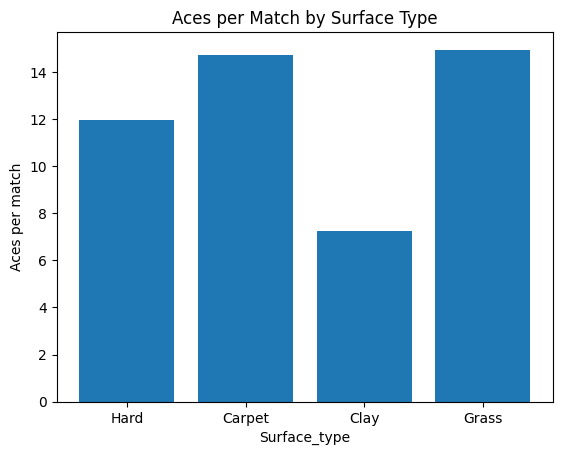

In [133]:
# Calculate the avg number of aces

Hard_avg = Hard_aces / Hard_matches
Carpet_avg = Carpet_aces / Carpet_matches
Clay_avg = Clay_aces / Clay_matches
Grass_avg = Grass_aces / Grass_matches

# Lets plot these averages
plt.bar(['Hard', 'Carpet', 'Clay', 'Grass'], [Hard_avg,Carpet_avg,Clay_avg,Grass_avg])
plt.xlabel('Surface_type')
plt.ylabel('Aces per match')
plt.title('Aces per Match by Surface Type')

## Linear Regression

#### Since we have completed our EDA, we will begin looking at linear regression models. To develop a model helping find player attributes that contribute or impede player performance, we will explore linear regression. To beign, let's start with simple linear regression. Our outcome variable will be total aces. Using that as our target variable, we will look at how strongly correlated other variables are to producing that outcome.

#### Heatmap for Feature Correlations

#### To view the correlations between some of the features, we will look at the correlation heatmap.

<AxesSubplot: >

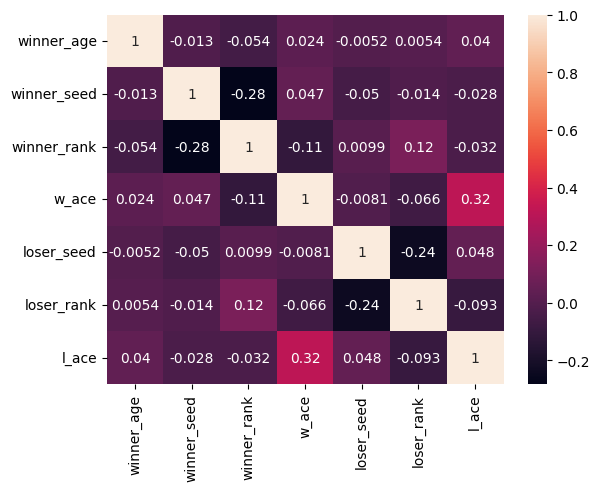

In [146]:
#Create dataframe that removes the 999 values for aces
mask = tennis_df_subset['total_ace'].isin([1998])
tennis_df_regression = tennis_df_subset[~mask]
tennis_df_regression_test = tennis_df_regression.copy()

#Create a heatmap with a subset of the columns in our dataframe
tennis_df_hm = tennis_df_regression_test[['winner_age', 'winner_seed', 'winner_rank', 'w_ace', 'loser_seed', 'loser_rank', 'l_ace']]

sns.heatmap(data=tennis_df_hm.corr(), annot=True)

#### Based on the heatmap above, there do not appear to be strong correlations between the features. There is a small positive correlation between the winner and loser ace totals, but there does not seem to be strong correlation overall.

#### Diagnostic plots

#### To begin, we need to create some diagnostic plots to determine if linear regression is a good choice for our analysis. One parameter to check is normality. We can do this with both the qq plot and Shapiro-Wilks test.

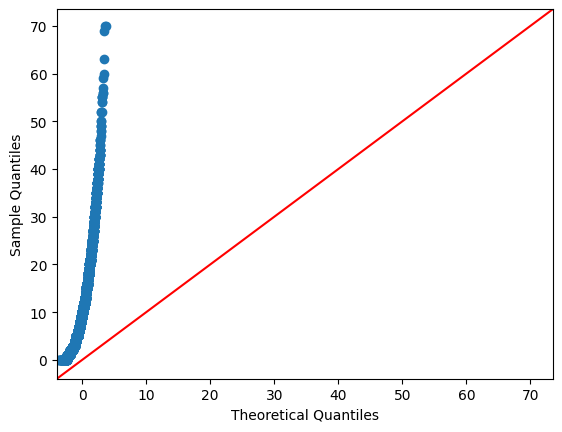

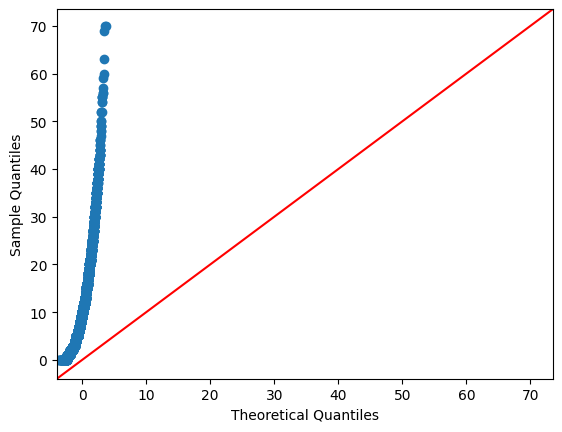

In [135]:
#Test for normality using qq plot

sm.qqplot(data=tennis_df_regression['total_ace'], line='45')

In [136]:
#Test for normality using Shapiro-Wilks test

scipy.stats.shapiro(tennis_df_regression['total_ace'].sample(n=500))


ShapiroResult(statistic=0.8927952647209167, pvalue=3.3946204005372204e-18)

#### Based on the qqplot and the Shapiro-Wilks test, the data does not appear to be Normally distributed.

#### Build regression model

#### Build a few models to look at correlations

In [137]:
#Build a simple linear regression model using OLS regression model for surface types
tennis_df_regression_test = tennis_df_regression.copy()

#Convert surface types to numbers first
surface_numbers = pd.get_dummies(tennis_df_regression_test['surface'])
tennis_df_regression_test = tennis_df_regression_test.join(surface_numbers)

#Create OLS regression model for clay
#x = tennis_df_regression.iloc[:, 17:21]
x_clay = tennis_df_regression_test['Clay']
x_hard = tennis_df_regression_test['Hard']
x_carpet = tennis_df_regression_test['Carpet']
x_grass = tennis_df_regression_test['Grass']
y = tennis_df_regression_test['total_ace']

lm_clay = sm.OLS(y, x_clay)
lm_hard = sm.OLS(y, x_hard)
lm_carpet = sm.OLS(y, x_carpet)
lm_grass = sm.OLS(y, x_grass)

lm_clay_fit = lm_clay.fit()
lm_hard_fit = lm_hard.fit()
lm_carpet_fit = lm_carpet.fit()
lm_grass_fit = lm_grass.fit()

#Linear model for clay surface
print(lm_clay_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:              total_ace   R-squared (uncentered):                   0.103
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              1460.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                   1.42e-302
Time:                        13:38:36   Log-Likelihood:                         -50289.
No. Observations:               12717   AIC:                                  1.006e+05
Df Residuals:                   12716   BIC:                                  1.006e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [138]:
#Linear model for hard surface
print(lm_hard_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:              total_ace   R-squared (uncentered):                   0.345
Model:                            OLS   Adj. R-squared (uncentered):              0.345
Method:                 Least Squares   F-statistic:                              6689.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:38:39   Log-Likelihood:                         -48292.
No. Observations:               12717   AIC:                                  9.659e+04
Df Residuals:                   12716   BIC:                                  9.659e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [139]:
#Linear model for carpet surface
print(lm_carpet_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:              total_ace   R-squared (uncentered):                   0.157
Model:                            OLS   Adj. R-squared (uncentered):              0.157
Method:                 Least Squares   F-statistic:                              2365.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:38:42   Log-Likelihood:                         -49895.
No. Observations:               12717   AIC:                                  9.979e+04
Df Residuals:                   12716   BIC:                                  9.980e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [140]:
#Linear model for grass surface
print(lm_grass_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:              total_ace   R-squared (uncentered):                   0.119
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              1714.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:38:44   Log-Likelihood:                         -50176.
No. Observations:               12717   AIC:                                  1.004e+05
Df Residuals:                   12716   BIC:                                  1.004e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Based on the models above, we have a very low R^2 for each type. This indicates that there appears to be no correlation between surface type and total ace count.

In [144]:
# OLS model with winner rank and winner aces

#Create OLS regression model
x = tennis_df_regression_test['winner_rank']
y = tennis_df_regression_test['total_ace']

lm_2 = sm.OLS(y, x)
lm_2_fit = lm_2.fit()
print(lm_2_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:              total_ace   R-squared (uncentered):                   0.237
Model:                            OLS   Adj. R-squared (uncentered):              0.237
Method:                 Least Squares   F-statistic:                              3943.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                        0.00
Time:                        14:07:18   Log-Likelihood:                         -49262.
No. Observations:               12717   AIC:                                  9.853e+04
Df Residuals:                   12716   BIC:                                  9.853e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

#### Similar to surface type, there appears to be low correlation between the winner's rank and the total number of aces produced.

#### Residual plot

#### Continuing to look at diagnostic plots, we will also look at the residuals plot. This will help decide if a linear model is a good approach.

<AxesSubplot: xlabel='winner_rank', ylabel='total_ace'>

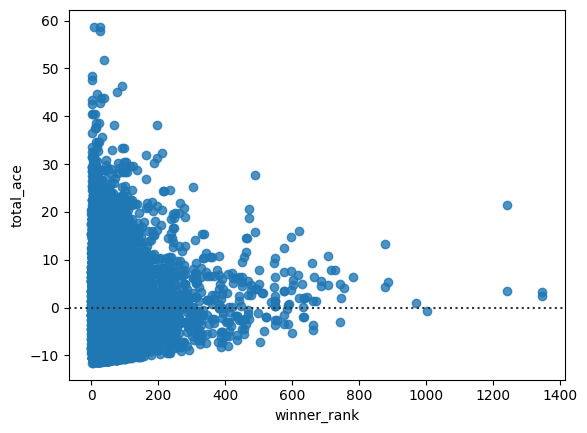

In [142]:
#Residuals Plot for winner rank and ace

sns.residplot(x='winner_rank', y='total_ace', data=tennis_df_regression_test)

#### Our residuals plot is not evenly dispursed throughout the plot, indicating that using a non-linear model may be a better approach.

#### Next, we'll look at the residuals vs. leverage plot to determine if any data points are having a large influence on the outcome.

<AxesSubplot: >

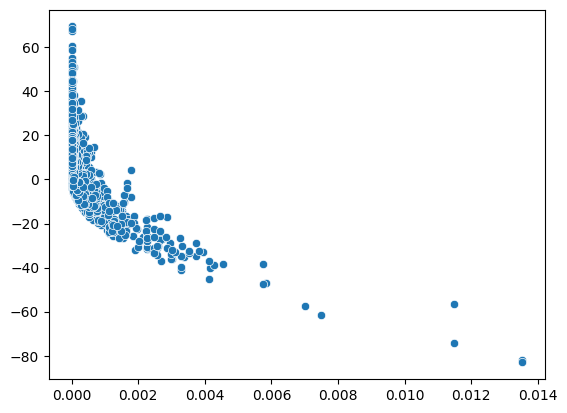

In [143]:
#Residuals vs. Leverage Plot for winners rank

#get the influence, leverage, and residual values
lm_2_infl = lm_2_fit.get_influence()
lm_2_lev = lm_2_infl.hat_matrix_diag
lm_2_resid = lm_2_fit.resid

#Plot the results
sns.scatterplot(x=lm_2_lev, y=lm_2_resid)

#### From the plot above, we can see that several points are having a larger influence on the outcome of the results. For a follow-up project, these points would need to be addressed.

## Conclusion

#### After modeling surface type and winner rank, there appears to be little to no correlation to ace production. We cannot use these features to accurately predict the number of total aces that would occur per match.

## Next Steps

#### The diagnostic plots indicate there could be more work to be performed in normalizing the data or finding features that may have a higher correlation with total ace production.

#### Additionally, we looked at only five years of data. To get a more comprehensive view of correlations to total ace production, the next step could be to include data from more years. This would help show longer term trends that may not be apparent in the five year window above.

## References

#### Tennis databases, files, and algorithms by Jeff Sackmann / Tennis Abstract is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.
#### Based on a work at https://github.com/JeffSackmann.